# Supervised Machine Learning - Encontro para Resolução de exercícios

## Instalação e importação dos pacotes

In [1]:
#%% Importando os pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
from statstests.process import stepwise
from statstests.tests import shapiro_francia
from scipy.stats import boxcox
from scipy.stats import norm
from scipy import stats

# Exercício 1 - `preço_casas.xlsx`

O objetivo é gerar um modelo onde conseguimos estimar o preço de um imóvel baseado num conjunto de características presentes no banco de dados.

As características do banco de dados são3:

-`preco`: valor do imóvel\
-`area_sqm`: área em metros quadrados\
-`quartos`: quantidade de quartos\
-`banheiros`: quantidade de banheiros\
-`rua_principal`: se o imóvel está localizado em uma rua principal do bairro\
-`quarto_hospedes`: se há quarto de hóspedes\
-`porao`: se tem ou não porão\
-`aquecimento_agua`: se tem aquecimento de água\
-`ar_condicionado`: se tem ou não ar condicionado\
-`vagas_garagem`: número de vagas de garagem\
-`local_pref`: se o imóvel está localizado em uma região preferencial, mais valorizada\
-`mobilia`: se a casa está mobilidada

## Importação dos dados

In [35]:
#%% Importando o banco de dados

dados = pd.read_excel('preço_casas.xlsx')
## Fonte: adaptado de https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction

dados.info()

#%% Estatísticas descritivas dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   preco             545 non-null    int64 
 1   area_sqm          545 non-null    int64 
 2   quartos           545 non-null    int64 
 3   banheiros         545 non-null    int64 
 4   rua_principal     545 non-null    object
 5   quarto_hospedes   545 non-null    object
 6   porao             545 non-null    object
 7   aquecimento_agua  545 non-null    object
 8   ar_condicionado   545 non-null    object
 9   vagas_garagem     545 non-null    int64 
 10  local_pref        545 non-null    object
 11  mobilia           545 non-null    object
dtypes: int64(5), object(7)
memory usage: 51.2+ KB


In [17]:
for column in dados.columns:
    print(f'-`{column}`')

-`preco`
-`area_sqm`
-`quartos`
-`banheiros`
-`rua_principal`
-`quarto_hospedes`
-`porao`
-`aquecimento_agua`
-`ar_condicionado`
-`vagas_garagem`
-`local_pref`
-`mobilia`


In [3]:
dados[0:5]

,preco,area_sqm,quartos,banheiros,rua_principal,quarto_hospedes,porao,aquecimento_agua,ar_condicionado,vagas_garagem,local_pref,mobilia
0,1330000,689,4,2,sim,não,não,não,sim,2,sim,mobiliado
1,1225000,832,4,4,sim,não,não,não,sim,3,não,mobiliado
2,1225000,925,3,2,sim,não,sim,não,não,2,sim,mobilia_parcial
3,1221500,697,4,2,sim,não,sim,não,sim,3,sim,mobiliado
4,1141000,689,4,1,sim,sim,sim,não,sim,2,não,mobiliado


In [4]:
dados[['preco', 'area_sqm', 'quartos', 'banheiros', 'vagas_garagem']].describe()

,preco,area_sqm,quartos,banheiros,vagas_garagem
count,5.450000e+02,545.00000,545.000000,545.000000,545.000000
mean,4.766729e+05,478.46055,2.965138,1.286239,0.693578
std,1.870440e+05,201.59249,0.738064,0.502470,0.861586
min,1.750000e+05,153.00000,1.000000,1.000000,0.000000
25%,3.430000e+05,334.00000,2.000000,1.000000,0.000000
50%,4.340000e+05,427.00000,3.000000,1.000000,0.000000
75%,5.740000e+05,591.00000,3.000000,2.000000,1.000000
max,1.330000e+06,1505.00000,6.000000,4.000000,3.000000


In [18]:
dados['rua_principal'].value_counts().sort_index()

rua_principal
não     77
sim    468
Name: count, dtype: int64

In [19]:
dados['quarto_hospedes'].value_counts().sort_index()

quarto_hospedes
não    448
sim     97
Name: count, dtype: int64

In [20]:
dados['porao'].value_counts().sort_index()

porao
não    354
sim    191
Name: count, dtype: int64

In [21]:
dados['aquecimento_agua'].value_counts().sort_index()

aquecimento_agua
não    520
sim     25
Name: count, dtype: int64

In [22]:
dados['ar_condicionado'].value_counts().sort_index()

ar_condicionado
não    373
sim    172
Name: count, dtype: int64

In [23]:
dados['local_pref'].value_counts().sort_index()

local_pref
não    417
sim    128
Name: count, dtype: int64

In [24]:
dados['mobilia'].value_counts().sort_index()

mobilia
mobilia_parcial    227
mobiliado          140
sem_mobilia        178
Name: count, dtype: int64

In [26]:
dados[dados['area_sqm']==max(dados['area_sqm'])]

,preco,area_sqm,quartos,banheiros,rua_principal,quarto_hospedes,porao,aquecimento_agua,ar_condicionado,vagas_garagem,local_pref,mobilia
7,1015000,1505,5,3,sim,não,não,não,não,0,não,sem_mobilia


## Verificando a existência de multicolinearidade

In [28]:
#%% Análise do coeficiente de correlação de Pearson entre as variáveis

pg.rcorr(dados[['preco', 'area_sqm', 'quartos', 'banheiros', 'vagas_garagem']],
         method = 'pearson', upper = 'pval', 
         decimals = 4, 
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})


C:\Users\Lucas Rezende\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:1116: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,preco,area_sqm,quartos,banheiros,vagas_garagem
preco,-,***,***,***,***
area_sqm,0.5359,-,***,***,***
quartos,0.3665,0.1518,-,***,***
banheiros,0.5175,0.1937,0.3739,-,***
vagas_garagem,0.3844,0.353,0.1393,0.1775,-


## Estimando a OLS

In [36]:
dados = pd.get_dummies(dados,
                       columns = ['rua_principal',
                                  'quarto_hospedes',
                                  'porao',
                                  'aquecimento_agua',
                                  'ar_condicionado',
                                  'local_pref',
                                  'mobilia'],
                       dtype = int,
                       drop_first = True)

In [37]:
dados

,preco,area_sqm,quartos,banheiros,vagas_garagem,rua_principal_sim,quarto_hospedes_sim,porao_sim,aquecimento_agua_sim,ar_condicionado_sim,local_pref_sim,mobilia_mobiliado,mobilia_sem_mobilia
0,1330000,689,4,2,2,1,0,0,0,1,1,1,0
1,1225000,832,4,4,3,1,0,0,0,1,0,1,0
2,1225000,925,3,2,2,1,0,1,0,0,1,0,0
3,1221500,697,4,2,3,1,0,1,0,1,1,1,0
4,1141000,689,4,1,2,1,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,182000,279,2,1,2,1,0,1,0,0,0,0,1
541,176715,223,3,1,0,0,0,0,0,0,0,0,0
542,175000,336,2,1,0,1,0,0,0,0,0,0,1
543,175000,270,3,1,0,0,0,0,0,0,0,1,0


In [39]:
#%% Modelo de Regressão Linear Múltipla (MQO)

# Estimação do modelo
reg = sm.OLS.from_formula(formula = 'preco ~ area_sqm + quartos + banheiros + \
                                     rua_principal_sim + quarto_hospedes_sim + \
                                     porao_sim + aquecimento_agua_sim + \
                                     ar_condicionado_sim + vagas_garagem + \
                                     local_pref_sim + mobilia_mobiliado + \
                                     mobilia_sem_mobilia',
                          data=dados).fit()


In [40]:
# Obtenção dos outputs
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  preco   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     83.14
Date:                Thu, 10 Oct 2024   Prob (F-statistic):          1.37e-113
Time:                        19:49:21   Log-Likelihood:                -7100.8
No. Observations:                 545   AIC:                         1.423e+04
Df Residuals:                     532   BIC:                         1.428e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5114.4326   2.61e+04      0.196      0.845   -4.61e+04    5.63e+04
area_sqm               248.9324     27.231      9.141      0.000     195.438     302.427
quartos                2.94e+04   7099.189      4.142      0.000    1.55e+04    4.33e+04
banheiros             1.138e+05   1.06e+04     10.768      0.000     9.3e+04    1.35e+05
rua_principal_sim     5.633e+04   1.47e+04      3.831      0.000    2.74e+04    8.52e+04
quarto_hospedes_sim    3.55e+04   1.37e+04      2.585      0.010    8519.520    6.25e+04
porao_sim             1.345e+04   1.11e+04      1.216      0.225   -8283.756    3.52e+04
aquecimento_agua_sim  9.057e+04   2.33e+04      3.888      0.000    4.48e+04    1.36e+05
ar_condicionado_sim   1.048e+05    1.1e+04      9.541      0.000    8.32e+04    1.26e+05
vagas_garagem          2.46e+04   6095.444      4.036      0.000    1.26e+04    3.66e+04
local_pref_sim        6.772e+04   1.21e+04      5.607      0.000     4.4e+04    9.14e+04
mobilia_mobiliado     6296.9936   1.22e+04      0.517      0.605   -1.76e+04    3.02e+04
mobilia_sem_mobilia  -3.759e+04   1.14e+04     -3.296      0.001      -6e+04   -1.52e+04
==============================================================================
Omnibus:                       84.098   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.610
Skew:                           0.840   Prob(JB):                     2.22e-40
Kurtosis:                       5.284   Cond. No.                     3.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Teste de aderência dos resíduos à normalidade

In [42]:
#%% Teste de verificação da aderência dos resíduos à normalidade

# Elaboração do teste de Shapiro-Francia
teste_sf = shapiro_francia(reg.resid)
round(teste_sf['p-value'], 5)

# Tomando a decisão por meio do teste de hipóteses

alpha = 0.05 # nível de significância do teste

if teste_sf['p-value'] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.961728966158495
statistics z  :  5.960073338775533
p-value  :  1.2606237779414531e-09
Rejeita-se H0 - Distribuição não aderente à normalidade


### Visualização dos resíduos

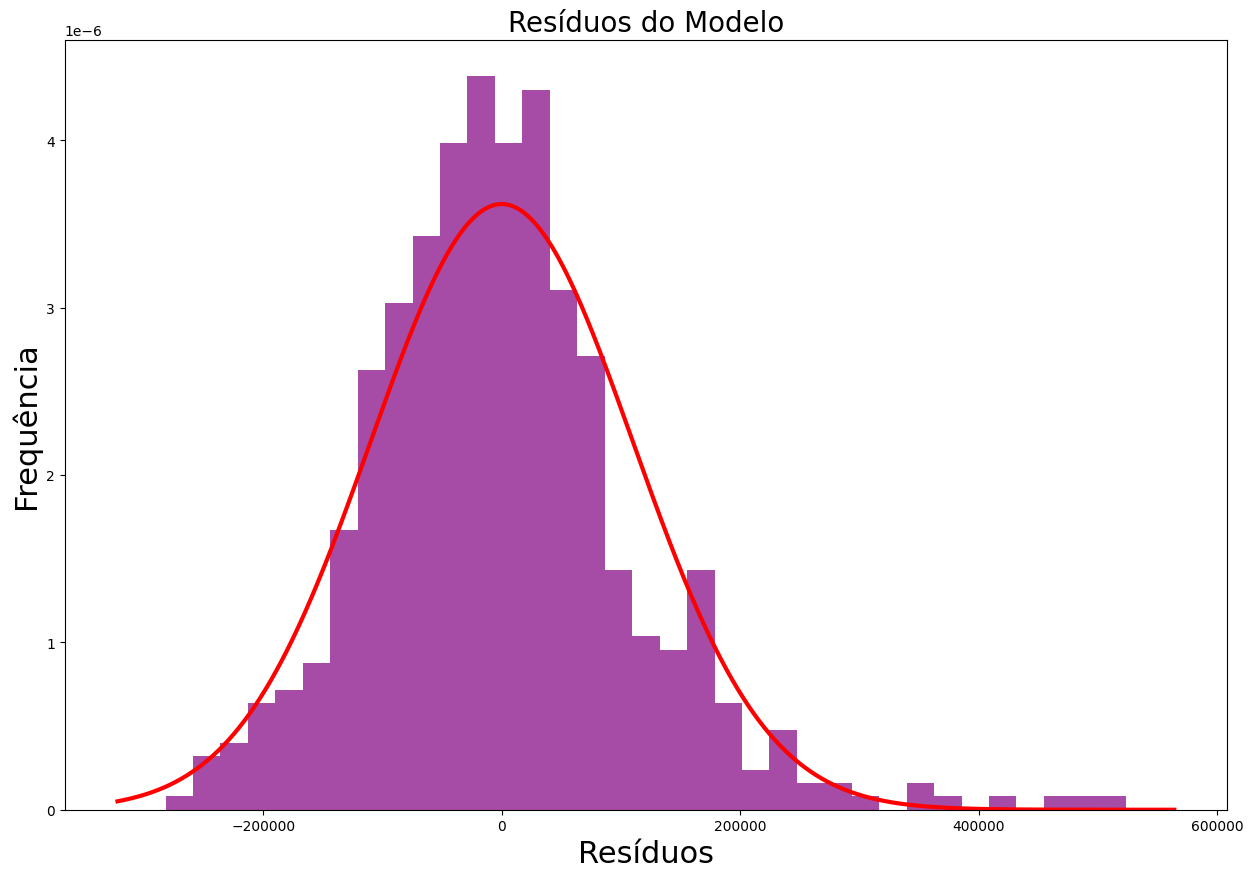

In [43]:
#%% Histograma dos resíduos do modelo OLS

# Parâmetros de referência para a distribuição normal teórica
(mu, std) = norm.fit(reg.resid)

# Criação do gráfico
plt.figure(figsize=(15,10))
plt.hist(reg.resid, bins=35, density=True, alpha=0.7, color='purple')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=3, color='red')
plt.title('Resíduos do Modelo', fontsize=20)
plt.xlabel('Resíduos', fontsize=22)
plt.ylabel('Frequência', fontsize=22)
plt.show()

## Procedimento de transformação de box-cox

O procedimento de transformação de box cox ajusta os resíduos para que sejam aderentes à normalidade. É criado um $Y_{BC}$ onde

\begin{equation}
Y_{BC} = \dfrac{Y^\lambda - 1}{\lambda}
\end{equation}

In [44]:
#%% Realizando a transformação de Box-Cox na variável dependente

y_box, lmbda = boxcox(dados['preco'])

# Valor obtido para o lambda
print(lmbda)

# Adicionando ao banco de dados
dados['preco_bc'] = y_box

-0.1346467215803929


In [47]:
dados[0:3]

,preco,area_sqm,quartos,banheiros,vagas_garagem,rua_principal_sim,quarto_hospedes_sim,porao_sim,aquecimento_agua_sim,ar_condicionado_sim,local_pref_sim,mobilia_mobiliado,mobilia_sem_mobilia,preco_bc
0,1330000,689,4,2,2,1,0,0,0,1,1,1,0,6.314477
1,1225000,832,4,4,3,1,0,0,0,1,0,1,0,6.302091
2,1225000,925,3,2,2,1,0,1,0,0,1,0,0,6.302091


In [48]:
# Estimação do modelo
reg_bc = sm.OLS.from_formula(formula = 'preco_bc ~ area_sqm + quartos + banheiros + \
                                        rua_principal_sim + quarto_hospedes_sim + \
                                        porao_sim + aquecimento_agua_sim + \
                                        ar_condicionado_sim + vagas_garagem + \
                                        local_pref_sim + mobilia_mobiliado + \
                                        mobilia_sem_mobilia',
                             data=dados).fit()

# Obtenção dos outputs
reg_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               preco_bc   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     88.06
Date:                Thu, 10 Oct 2024   Prob (F-statistic):          6.35e-118
Time:                        19:58:56   Log-Likelihood:                 1019.2
No. Observations:                 545   AIC:                            -2012.
Df Residuals:                     532   BIC:                            -1957.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.9768      0.009    677.790      0.000       5.959       5.994
area_sqm              8.719e-05   9.21e-06      9.464      0.000    6.91e-05       0.000
quartos                  0.0114      0.002      4.746      0.000       0.007       0.016
banheiros                0.0325      0.004      9.105      0.000       0.026       0.040
rua_principal_sim        0.0259      0.005      5.210      0.000       0.016       0.036
quarto_hospedes_sim      0.0140      0.005      3.013      0.003       0.005       0.023
porao_sim                0.0085      0.004      2.262      0.024       0.001       0.016
aquecimento_agua_sim     0.0297      0.008      3.762      0.000       0.014       0.045
ar_condicionado_sim      0.0364      0.004      9.806      0.000       0.029       0.044
vagas_garagem            0.0064      0.002      3.127      0.002       0.002       0.010
local_pref_sim           0.0227      0.004      5.545      0.000       0.015       0.031
mobilia_mobiliado       -0.0032      0.004     -0.768      0.443      -0.011       0.005
mobilia_sem_mobilia     -0.0238      0.004     -6.167      0.000      -0.031      -0.016
==============================================================================
Omnibus:                        2.471   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                2.303
Skew:                          -0.111   Prob(JB):                        0.316
Kurtosis:                       3.228   Cond. No.                     3.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#%% Reavaliando aderência à normalidade dos resíduos do modelo

# Teste de Shapiro-Francia
teste_sf_bc = shapiro_francia(reg_bc.resid)

# Tomando a decisão por meio do teste de hipóteses

alpha = 0.05 # nível de significância do teste

if teste_sf_bc['p-value'] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9955639435080579
statistics z  :  1.2065943649622548
p-value  :  0.11379419897644988
Não se rejeita H0 - Distribuição aderente à normalidade


## Procedimento stepwise

In [50]:
#%% Removendo as variáveis que não apresentam significância estatística

# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

# Stepwise do modelo
modelo_stepwise_bc = stepwise(reg_bc, pvalue_limit=0.05)


Regression type: OLS 

Estimating model...: 
 preco_bc ~ Q('area_sqm') + Q('quartos') + Q('banheiros') + Q('rua_principal_sim') + Q('quarto_hospedes_sim') + Q('porao_sim') + Q('aquecimento_agua_sim') + Q('ar_condicionado_sim') + Q('vagas_garagem') + Q('local_pref_sim') + Q('mobilia_mobiliado') + Q('mobilia_sem_mobilia')

 Discarding atribute "Q('mobilia_mobiliado')" with p-value equal to 0.4430979286708927 

Estimating model...: 
 preco_bc ~ Q('area_sqm') + Q('quartos') + Q('banheiros') + Q('rua_principal_sim') + Q('quarto_hospedes_sim') + Q('porao_sim') + Q('aquecimento_agua_sim') + Q('ar_condicionado_sim') + Q('vagas_garagem') + Q('local_pref_sim') + Q('mobilia_sem_mobilia')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('mobilia_mobiliado')", 'p-value': 0.4430979286708927}

 Model after stepwise process...: 
 preco_bc ~ Q('area_sqm') + Q('quartos') + Q('banheiros') + Q('rua_principal_sim') + Q('quarto_hospedes_sim') + Q('

In [51]:
# Teste de Shapiro-Francia
teste_sf_step = shapiro_francia(modelo_stepwise_bc.resid)

method  :  Shapiro-Francia normality test
statistics W  :  0.9952963638023059
statistics z  :  1.3357920147130462
p-value  :  0.09080863186585386


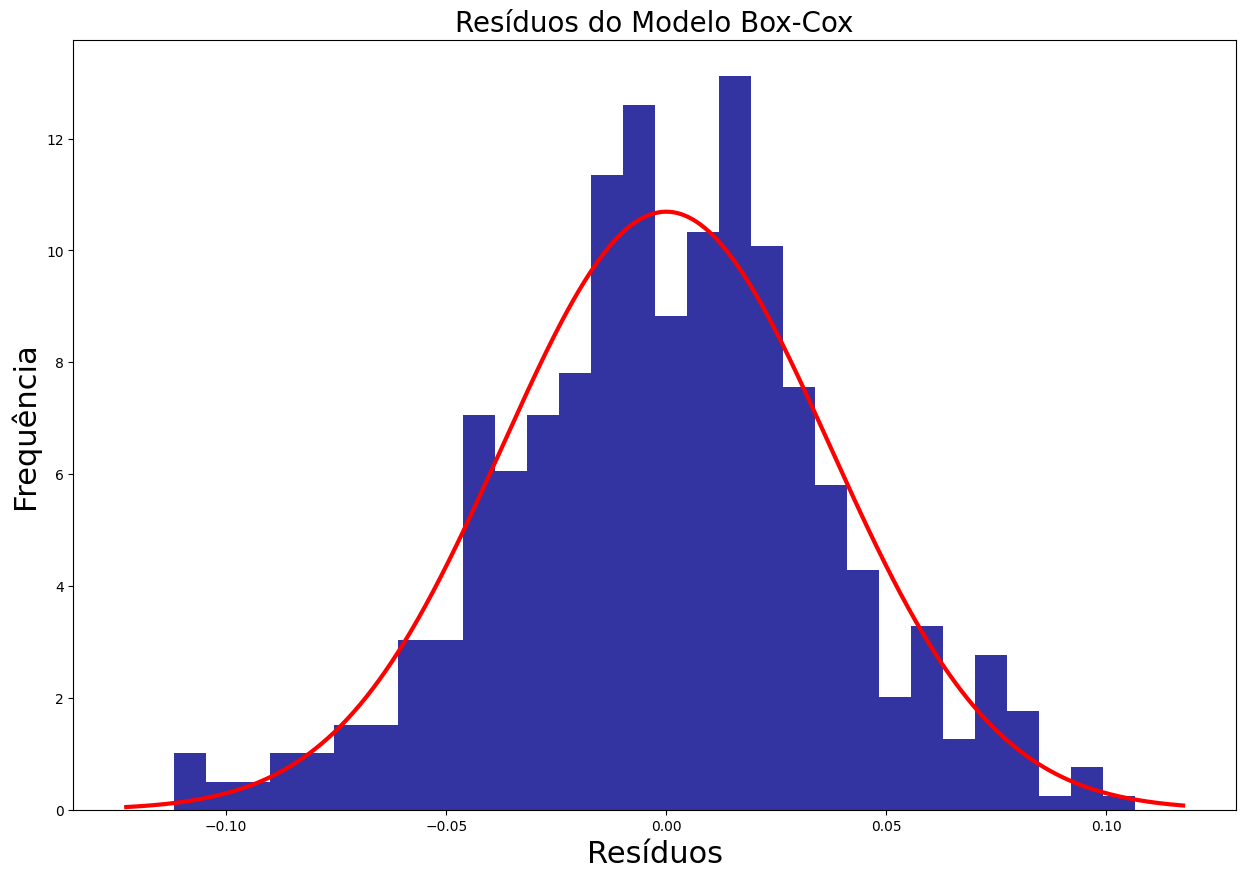

In [52]:
#%% Novo histograma dos resíduos do modelo

# Parâmetros de referência para a distribuição normal teórica
(mu_bc, std_bc) = norm.fit(modelo_stepwise_bc.resid)

# Criação do gráfico
plt.figure(figsize=(15,10))
plt.hist(modelo_stepwise_bc.resid, bins=30, density=True, alpha=0.8, color='darkblue')
xmin_bc, xmax_bc = plt.xlim()
x_bc = np.linspace(xmin_bc, xmax_bc, 1000)
p_bc = norm.pdf(x_bc, mu_bc, std_bc)
plt.plot(x_bc, p_bc, linewidth=3, color='red')
plt.title('Resíduos do Modelo Box-Cox', fontsize=20)
plt.xlabel('Resíduos', fontsize=22)
plt.ylabel('Frequência', fontsize=22)
plt.show()

## Fazendo predições

In [53]:
# Modelo Não Linear (Box-Cox):
valor_pred_bc = modelo_stepwise_bc.predict(pd.DataFrame({'area_sqm':[350],
                                                         'quartos': [3],
                                                         'banheiros': [3],
                                                         'rua_principal_sim': [1],
                                                         'quarto_hospedes_sim': [0],
                                                         'porao_sim': [0],
                                                         'aquecimento_agua_sim': [0],
                                                         'ar_condicionado_sim': [1],
                                                         'vagas_garagem': [2],
                                                         'local_pref_sim': [0],
                                                         'mobilia_sem_mobilia': [0]}))

# Valor predito pelo modelo BC
print(f"Valor Predito (Box-Cox): {round(valor_pred_bc[0], 2)}")

Valor Predito (Box-Cox): 6.21


In [54]:
# Cálculo inverso para a obtenção do valor predito Y (preço)
valor_pred_preco = (valor_pred_bc * lmbda + 1) ** (1 / lmbda)
print(f"Valor Predito (Preço): {round(valor_pred_preco[0], 2)}")

Valor Predito (Preço): 694874.84


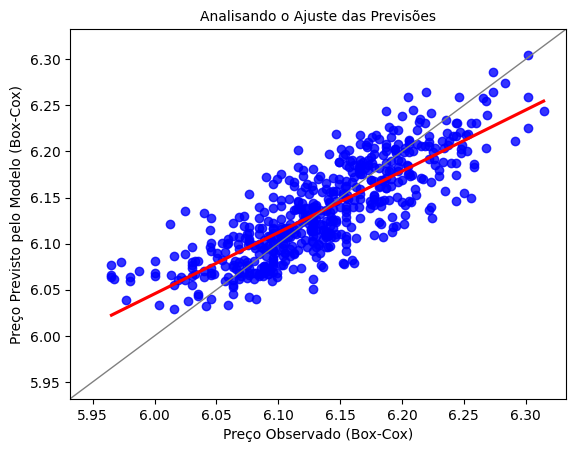

In [55]:
#%% Gráfico fitted values

# Valores preditos pelo modelo para as observações da amostra
dados['fitted_bc'] = modelo_stepwise_bc.predict()

sns.regplot(dados, x='preco_bc', y='fitted_bc', color='blue', ci=False, line_kws={'color': 'red'})
plt.title('Analisando o Ajuste das Previsões', fontsize=10)
plt.xlabel('Preço Observado (Box-Cox)', fontsize=10)
plt.ylabel('Preço Previsto pelo Modelo (Box-Cox)', fontsize=10)
plt.axline((5.95, 5.95), (max(dados['preco_bc']), max(dados['preco_bc'])), linewidth=1, color='grey')
plt.show()

### Teste de Breusch-Pagan

#### Aplicação do teste no modelo Box-Cox

In [56]:
#%% Criação da função para o teste de Breusch-Pagan (heterocedasticidade)

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value

#%% Aplicando a função criada para realizar o teste

teste_bp = breusch_pagan_test(modelo_stepwise_bc)

# Tomando a decisão por meio do teste de hipóteses

alpha = 0.05 # nível de significância do teste

if teste_bp[1] > alpha:
    print('Não se rejeita H0 - Ausência de Heterocedasticidade')
else:
	print('Rejeita-se H0 - Existência de Heterocedasticidade')

chisq: 1.8937716465009156
p-value: 0.22493082100631603
Não se rejeita H0 - Ausência de Heterocedasticidade


In [57]:
#%% Analisando a presença de heterocedasticidade no modelo original

teste_bp_original = breusch_pagan_test(reg)

# Tomando a decisão por meio do teste de hipóteses

alpha = 0.05 # nível de significância do teste

if teste_bp_original[1] > alpha:
    print('Não se rejeita H0 - Ausência de Heterocedasticidade')
else:
	print('Rejeita-se H0 - Existência de Heterocedasticidade')

## O modelo com a transformação de Box-Cox ajustou os termos
## de erros heterocedásticos, indicando potencial erro 
## da forma funcional do modelo originalmente estimado

#%% Fim!

chisq: 103.86774339858435
p-value: 2.1832617715266312e-24
Rejeita-se H0 - Existência de Heterocedasticidade


# Exercício 2 - `recursos_humanos.xlsx`

Uma compania deseja avaliar os fatores associados aos pedidos de demissão de seus funcionários. Contém as seguintes categorias:

- `demissao`:  target do modelo
- `idade`:  idade do funcionário
- `dist_residencia`:  distância da empresa até a residência
- `satisfacao_amb`:  satisfação no ambiente de trabalho
- `sexo`
- `satisfacao_cargo`: nível de satisfação no cargo  
- `estado_civil`  
- `salario`
- `hora_extra`:  se realiza hora extra ou não
- `qtd_treinamentos`:  quantidade de treinamentos que recebe
- `anos_empresa`:  quantos anos está na empresa
- `anos_promo`: há quantos anos recebeu sua última promoção

Iremos utilizar um modelo de regressão logística para estimar a probabilidade do funcionário pedir demissão ou não.

In [85]:
#%% Importando os pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
from statstests.process import stepwise
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score

## Preparando a base de dados

In [86]:
#%% Importando o banco de dados

demissao = pd.read_excel('recursos_humanos.xlsx')
## Fonte: adaptado de https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
demissao[0:4]

,demissao,idade,dist_residencia,satisfacao_amb,sexo,satisfacao_cargo,estado_civil,salario,hora_extra,qtd_treinamentos,anos_empresa,anos_promo
0,sim,41,1,média,feminino,muito_alta,solteiro,5993,sim,0,6,0
1,nao,49,8,alta,masculino,medio,casado,5130,não,3,10,1
2,sim,37,2,muito_alta,masculino,alta,solteiro,2090,sim,3,0,0
3,nao,33,3,muito_alta,feminino,alta,casado,2909,sim,3,8,3


In [87]:
demissao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   demissao          1470 non-null   object
 1   idade             1470 non-null   int64 
 2   dist_residencia   1470 non-null   int64 
 3   satisfacao_amb    1470 non-null   object
 4   sexo              1470 non-null   object
 5   satisfacao_cargo  1470 non-null   object
 6   estado_civil      1470 non-null   object
 7   salario           1470 non-null   int64 
 8   hora_extra        1470 non-null   object
 9   qtd_treinamentos  1470 non-null   int64 
 10  anos_empresa      1470 non-null   int64 
 11  anos_promo        1470 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 137.9+ KB


In [88]:
#%% Estatísticas descritivas

# Variáveis métricas
demissao[['idade', 'dist_residencia', 'salario']].describe()

,idade,dist_residencia,salario
count,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,6502.931293
std,9.135373,8.106864,4707.956783
min,18.000000,1.000000,1009.000000
25%,30.000000,2.000000,2911.000000
50%,36.000000,7.000000,4919.000000
75%,43.000000,14.000000,8379.000000
max,60.000000,29.000000,19999.000000


In [89]:
demissao[['qtd_treinamentos', 'anos_empresa', 'anos_promo']].describe()

,qtd_treinamentos,anos_empresa,anos_promo
count,1470.000000,1470.000000,1470.000000
mean,2.799320,7.008163,2.187755
std,1.289271,6.126525,3.222430
min,0.000000,0.000000,0.000000
25%,2.000000,3.000000,0.000000
50%,3.000000,5.000000,1.000000
75%,3.000000,9.000000,3.000000
max,6.000000,40.000000,15.000000


In [90]:
# Variáveis categóricas
demissao['demissao'].value_counts().sort_index()

demissao
nao    1233
sim     237
Name: count, dtype: int64

In [91]:
demissao['satisfacao_amb'].value_counts().sort_index()

satisfacao_amb
alta          453
baixa         284
muito_alta    446
média         287
Name: count, dtype: int64

In [92]:
demissao['sexo'].value_counts().sort_index()

sexo
feminino     588
masculino    882
Name: count, dtype: int64

In [93]:
demissao['satisfacao_cargo'].value_counts().sort_index()

satisfacao_cargo
alta          442
baixo         289
medio         280
muito_alta    459
Name: count, dtype: int64

In [94]:
demissao['estado_civil'].value_counts().sort_index()

estado_civil
casado        673
divorciado    327
solteiro      470
Name: count, dtype: int64

In [95]:
demissao['hora_extra'].value_counts().sort_index()

hora_extra
não    1054
sim     416
Name: count, dtype: int64

In [96]:
# Codificando evento = 1; não evento = 0
demissao.loc[demissao['demissao']=='sim', 'demissao'] = 1
demissao.loc[demissao['demissao']=='nao', 'demissao'] = 0

# Transformando em variável numérica
demissao['demissao'] = demissao['demissao'].astype('int')
demissao[0:3]

,demissao,idade,dist_residencia,satisfacao_amb,sexo,satisfacao_cargo,estado_civil,salario,hora_extra,qtd_treinamentos,anos_empresa,anos_promo
0,1,41,1,média,feminino,muito_alta,solteiro,5993,sim,0,6,0
1,0,49,8,alta,masculino,medio,casado,5130,não,3,10,1
2,1,37,2,muito_alta,masculino,alta,solteiro,2090,sim,3,0,0


### Processo de dummyzação

In [97]:
#%% Criando as n-1 dummies das variáveis explicativas categóricas

demissao_dummies = pd.get_dummies(demissao,
                                  columns=['satisfacao_amb',
                                           'sexo',
                                           'satisfacao_cargo',
                                           'estado_civil',
                                           'hora_extra'],
                                  dtype=int,
                                  drop_first=True)

## Gerando o modelo

In [98]:
#%% Criando o texto da fórmula

def texto_formula(df, var_dependente, excluir_cols):
    variaveis = list(df.columns.values)
    variaveis.remove(var_dependente)
    for col in excluir_cols:
        variaveis.remove(col)
    return var_dependente + ' ~ ' + ' + '.join(variaveis)

texto_regressao = texto_formula(demissao_dummies, 'demissao', '')
# 1º argumento: banco de dados
# 2º argumento: variável dependente
# 3º argumento: variáveis a serem excluídas (se houver, inserir como lista)
texto_regressao

'demissao ~ idade + dist_residencia + salario + qtd_treinamentos + anos_empresa + anos_promo + satisfacao_amb_baixa + satisfacao_amb_muito_alta + satisfacao_amb_média + sexo_masculino + satisfacao_cargo_baixo + satisfacao_cargo_medio + satisfacao_cargo_muito_alta + estado_civil_divorciado + estado_civil_solteiro + hora_extra_sim'

In [100]:
#%% Regressão Logística Binária

# Estimando o modelo
modelo_demissao = sm.Logit.from_formula(texto_regressao,
                                        demissao_dummies).fit()

# Analisando os resultados
modelo_demissao.summary()

Optimization terminated successfully.
         Current function value: 0.348464
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               demissao   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1453
Method:                           MLE   Df Model:                           16
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                  0.2111
Time:                        12:19:43   Log-Likelihood:                -512.24
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 5.738e-49
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -1.0577      0.456     -2.319      0.020      -1.952      -0.164
idade                          -0.0318      0.010     -3.082      0.002      -0.052      -0.012
dist_residencia                 0.0319      0.009      3.356      0.001       0.013       0.050
salario                     -9.185e-05    2.8e-05     -3.285      0.001      -0.000   -3.71e-05
qtd_treinamentos               -0.1274      0.064     -1.994      0.046      -0.253      -0.002
anos_empresa                   -0.0883      0.025     -3.600      0.000      -0.136      -0.040
anos_promo                      0.1435      0.037      3.853      0.000       0.070       0.216
satisfacao_amb_baixa            1.0508      0.222      4.737      0.000       0.616       1.486
satisfacao_amb_muito_alta      -0.1452      0.216     -0.671      0.502      -0.569       0.279
satisfacao_amb_média            0.1105      0.237      0.467      0.640      -0.353       0.574
sexo_masculino                  0.2997      0.167      1.799      0.072      -0.027       0.626
satisfacao_cargo_baixo          0.5176      0.214      2.418      0.016       0.098       0.937
satisfacao_cargo_medio          0.0795      0.233      0.341      0.733      -0.377       0.536
satisfacao_cargo_muito_alta    -0.5971      0.216     -2.761      0.006      -1.021      -0.173
estado_civil_divorciado        -0.2888      0.236     -1.223      0.221      -0.752       0.174
estado_civil_solteiro           0.9604      0.178      5.382      0.000       0.611       1.310
hora_extra_sim                  1.6557      0.168      9.846      0.000       1.326       1.985
===============================================================================================
"""

In [101]:
## Algumas variáveis não apresentam significância estatística ao nível de 5%

#%% Obtendo o modelo após o procedimento de stepwise

# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

modelo_stepwise = stepwise(modelo_demissao, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 demissao ~ Q('idade') + Q('dist_residencia') + Q('salario') + Q('qtd_treinamentos') + Q('anos_empresa') + Q('anos_promo') + Q('satisfacao_amb_baixa') + Q('satisfacao_amb_muito_alta') + Q('satisfacao_amb_média') + Q('sexo_masculino') + Q('satisfacao_cargo_baixo') + Q('satisfacao_cargo_medio') + Q('satisfacao_cargo_muito_alta') + Q('estado_civil_divorciado') + Q('estado_civil_solteiro') + Q('hora_extra_sim')
Optimization terminated successfully.
         Current function value: 0.348464
         Iterations 7

 Discarding atribute "Q('satisfacao_cargo_medio')" with p-value equal to 0.7329876646876234 

Estimating model...: 
 demissao ~ Q('idade') + Q('dist_residencia') + Q('salario') + Q('qtd_treinamentos') + Q('anos_empresa') + Q('anos_promo') + Q('satisfacao_amb_baixa') + Q('satisfacao_amb_muito_alta') + Q('satisfacao_amb_média') + Q('sexo_masculino') + Q('satisfacao_cargo_baixo') + Q('satisfacao_cargo_muito_alta') + Q('estado_civil_divorc

## Fazendo predições

In [114]:
#%% Armazenando os valores previstos para amostra

demissao_dummies['previsto'] = modelo_stepwise.predict()

## Refere-se à probabilidade de ocorrência do evento (demissão = 1)

In [165]:
modelo_stepwise.predict(pd.DataFrame({'idade': [29],
    'dist_residencia': [0.2],
    'salario': [5000],
    'qtd_treinamentos': [2],
    'anos_empresa': [5],
    'satisfacao_amb_baixa': [0],
    'satisfacao_cargo_baixo': [0],
    'satisfacao_cargo_muito_alta': [0],
    'estado_civil_solteiro': [1],
    'hora_extra_sim': [0],
    'anos_promo':5
}))

0    0.218398
dtype: float64

In [172]:


#%% Realizando predições

# Qual é a probabilidade média esperada de um funcionário  
# com as seguintes características pedir demissão?

prob_pred = modelo_stepwise.predict(pd.DataFrame({'satisfacao_amb_baixa':[1],
                                                  'satisfacao_cargo_baixo': [0],
                                                  'satisfacao_cargo_muito_alta': [1],
                                                  'estado_civil_solteiro': [0],
                                                  'hora_extra_sim': [0],
                                                  'idade': [30],
                                                  'dist_residencia': [5],
                                                  'salario': [3000],
                                                  'qtd_treinamentos': [2],
                                                  'anos_empresa': [6],
                                                  'anos_promo': [2]}))

# O resultado mostra a probabilidade média estimada de ocorrência do evento
print(f"Probabilidade Predita: {round(prob_pred[0]*100, 2)}%")

Probabilidade Predita: 11.6%


## Matriz de Confusão

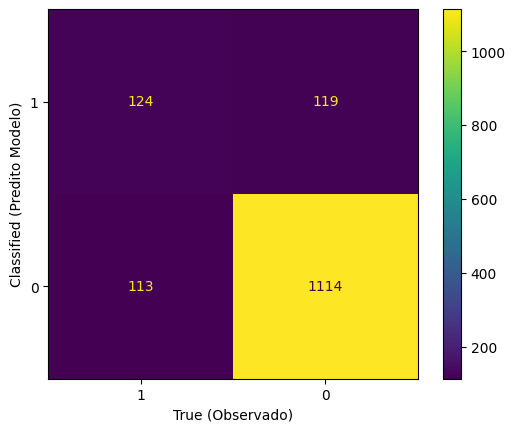

,Sensitividade,Especificidade,Acurácia
0,0.523207,0.903487,0.842177


In [169]:
#%% Matriz de confusão (definição da função)

def matriz_confusao(predicts, observado, cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
        
    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)
           
    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True (Observado)')
    plt.ylabel('Classified (Predito Modelo)')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
        
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

#%% Matriz de confusão 

# Cutoff = 0.30
matriz_confusao(observado=demissao_dummies['demissao'],
                predicts=demissao_dummies['previsto'], 
                cutoff=0.30)

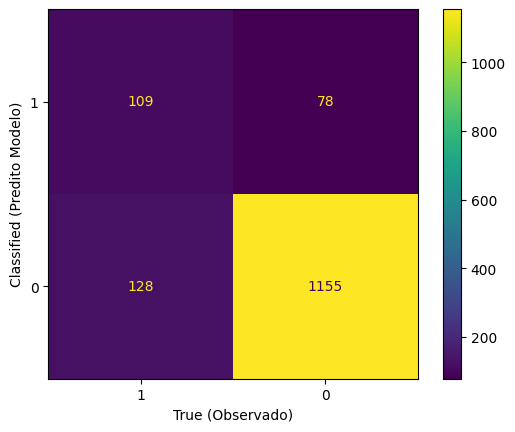

,Sensitividade,Especificidade,Acurácia
0,0.459916,0.93674,0.859864


In [170]:
# Cutoff = 0.35
matriz_confusao(observado=demissao_dummies['demissao'],
                predicts=demissao_dummies['previsto'], 
                cutoff=0.35)

## Construção da Curva ROC

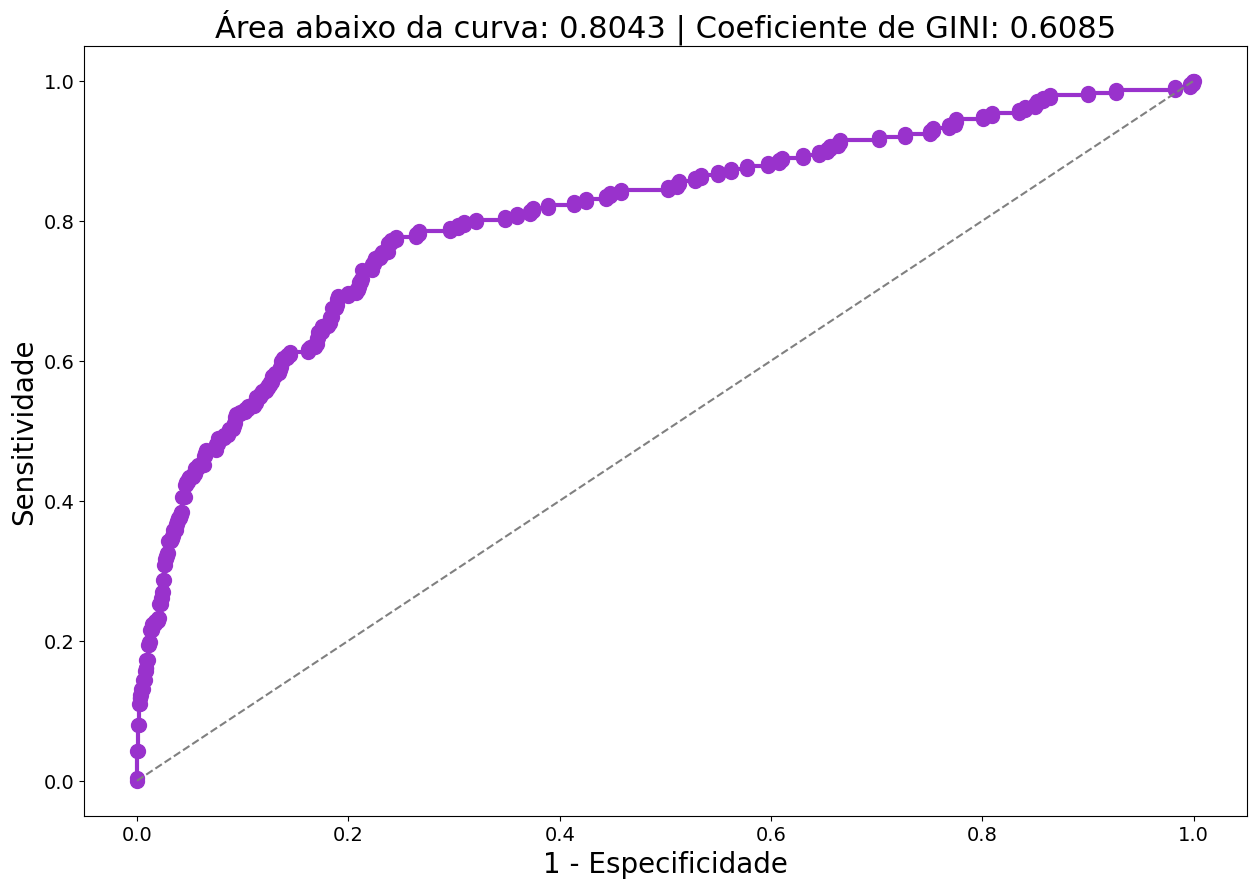

In [171]:
# A avaliação por meio da matriz de confusão depende do cutoff escolhido

#%% Análise da curva ROC

# Parametrizando a função da curva ROC (real vs. previsto)
fpr, tpr, thresholds = roc_curve(demissao_dummies['demissao'], demissao_dummies['previsto'])
roc_auc = auc(fpr, tpr)

# Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotando a curva ROC
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=10, linewidth=3)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Área abaixo da curva: %g' % round(roc_auc, 4) +
          ' | Coeficiente de GINI: %g' % round(gini, 4), fontsize=22)
plt.xlabel('1 - Especificidade', fontsize=20)
plt.ylabel('Sensitividade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show()

### Analisando a Odds Ratio das variáveis explicativas

In [173]:
#%% Analisando a odds ratio das variáveis explicativas

# Coeficientes betas estimados pelo modelo stepwise
modelo_stepwise.params[1:]

Q('idade')                         -0.032238
Q('dist_residencia')                0.032280
Q('salario')                       -0.000091
Q('qtd_treinamentos')              -0.131297
Q('anos_empresa')                  -0.089140
Q('anos_promo')                     0.142538
Q('satisfacao_amb_baixa')           1.070435
Q('satisfacao_cargo_baixo')         0.495070
Q('satisfacao_cargo_muito_alta')   -0.595085
Q('estado_civil_solteiro')          1.019344
Q('hora_extra_sim')                 1.618016
dtype: float64

In [174]:
# Em média, mantidas as demais condições constates, a chance de um funcionário
# pedir demissão é multiplicada por um fator de 2.77 ao ser solteiro 
# ao invés de ser casado ou divorciado

# Portanto, em média, a chance é 177% maior

# Para detalhar o resultado, note que a chance = p / (1 - p)

# Não solteiro (portanto, ser casado ou divorciado)
0.116 / (1 - 0.116)

0.13122171945701358

In [175]:
# Solteiro (realizar o predict para solteiro = 1 sem alterar outros)
0.2667 / (1 - 0.2667)

###############################################################################

0.36369834992499656

In [176]:
# Exemplo: odds ratio da variável 'qtd_treinamentos'
np.exp(-0.131297)

# Em média, mantidas as demais condições constates, a chance de um funcionário
# pedir demissão é multiplicada por um fator de 0.8769
# ao receber 1 treinamento a mais

0.8769572793974708

In [177]:
# Portanto, em média, a chance é 12,31% menor

# Para detalhar o resultado, note que a chance = p / (1 - p)

# qtd_treinamentos = 2
0.116 / (1 - 0.116)

0.13122171945701358

In [178]:
# qtd_treinamentos = 3 (realizar o novo predict sem alterar outros)
0.1032 / (1 - 0.1032)

#%% Fim!

0.11507582515611062

# Exercício 3 - `acidentes.xlsx`

O banco de dados contém a quantidade de acidentes de trânsito por semana em 100 cidades. O banco contém seguintes variáveis:

- `acidentes`: número de acidentes por semana
- `pop`: população em milhão
- `idade`: idade média dos habitantes da cidade com carteira de habilitação
- `leiseca`: variável que indica se a cidade adota a lei seca após as 22h

Naturalmente, a ideia é modelar o número de acidentes em função das variáveis explicaivas `pop`, `idade` e `leiseca`. Como a variável de interesse é discreta, quantitativa, e é dada por uma taxa de tempo, utilizaremos o modelo para dados de contagem.

### Instalação e importação dos pacotes

In [180]:
#%% Importando os pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.discrete.discrete_model import NegativeBinomial, Poisson
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP,ZeroInflatedPoisson
import warnings
warnings.filterwarnings('ignore')

### Preparação da base de dados

In [181]:
acidentes = pd.read_excel('acidentes.xlsx')
## Fonte: Fávero e Belfiore (2024) Manual de Análise de Dados, Capítulo 14
acidentes[0:4]

,acidentes,pop,idade,leiseca
0,7,0.760693,49.51,0
1,0,1.433687,51.93,0
2,0,0.737124,60.00,0
3,0,2.838604,59.00,0


In [183]:
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   acidentes  100 non-null    int64  
 1   pop        100 non-null    float64
 2   idade      100 non-null    float64
 3   leiseca    100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [184]:
#%% Estatísticas descritivas

# Variáveis métricas
acidentes[['acidentes', 'pop', 'idade']].describe()

,acidentes,pop,idade
count,100.000000,100.000000,100.00000
mean,3.010000,1.774185,50.12270
std,6.557431,0.769494,7.69488
min,0.000000,0.650289,24.00000
25%,0.000000,1.353586,47.77250
50%,0.000000,1.463477,51.75500
75%,3.000000,2.300476,54.94750
max,33.000000,2.867504,61.00000


In [185]:
# Variável categórica
acidentes['leiseca'].value_counts()

leiseca
0    58
1    42
Name: count, dtype: int64

In [190]:
# Tabela de frequências de Y
acidentes['acidentes'].value_counts()

acidentes
0     58
1      8
2      6
3      6
4      4
5      3
8      2
6      2
9      2
25     1
20     1
10     1
16     1
7      1
33     1
14     1
30     1
31     1
Name: count, dtype: int64

Parece haver número excessivo de zeros.

### Visualizando a contagem de dados

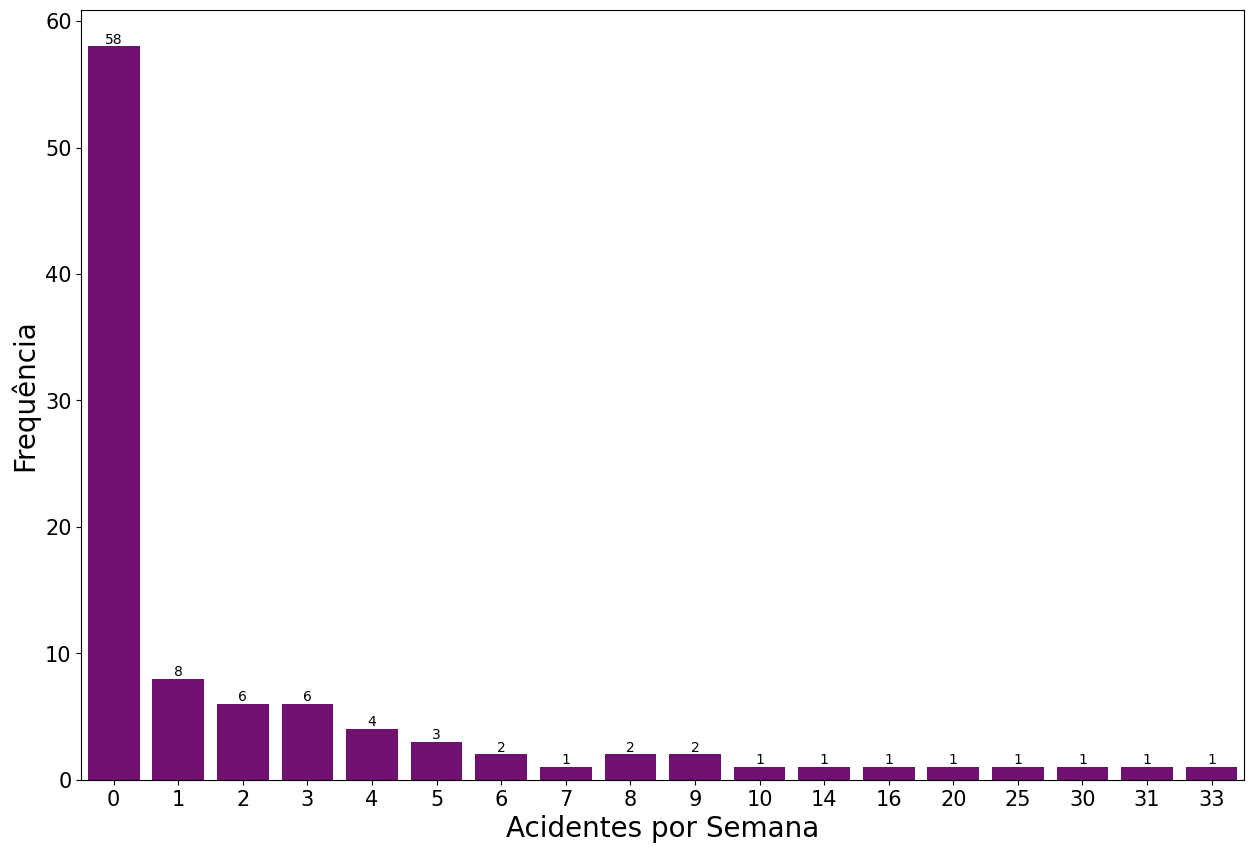

In [192]:
#%% Histograma da variável dependente

plt.figure(figsize=(15,10))
ax = sns.barplot(data = acidentes['acidentes'].value_counts().sort_index(), color='purple')
ax.bar_label(ax.containers[0])
plt.xlabel('Acidentes por Semana', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Verificando a existência de superdispersão

In [207]:
#%% Comparação média x variância da variável dependente

print(f"Média: {round(acidentes['acidentes'].mean(), 2)}")
print(f"Variância: {round(acidentes['acidentes'].var(), 2)}")

# Variância consideravelmente maior do que a média!

Média: 3.01
Variância: 43.0


## Criando um modelo

### Poisson Zero Inflated

Vamos estimar o modelo Zero Inflated, para isso vamos precisar definir variáveis preditoras que fazem parte do componente de contagem, e variáveis preditoras que fazem parte do componente logit.

In [195]:
# Variável dependente
y = acidentes['acidentes']

# Variáveis preditoras: componente de contagem
x1 = acidentes['pop']
X1 = sm.add_constant(x1)

# Variáveis preditoras: componente logit (zero inflated)
x2 = acidentes[['idade', 'leiseca']]
X2 = sm.add_constant(x2)

In [196]:
#%% Modelo Zero Inflated Poisson 

# Estimando o modelo
modelo_zip = sm.ZeroInflatedPoisson(y, X1, exog_infl=X2,
                                    inflation='logit').fit()

# Parâmetros do modelo
modelo_zip.summary()

         Current function value: 2.560484
         Iterations: 35
         Function evaluations: 67
         Gradient evaluations: 67


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:               acidentes   No. Observations:                  100
Model:             ZeroInflatedPoisson   Df Residuals:                       98
Method:                            MLE   Df Model:                            1
Date:                 Sat, 12 Oct 2024   Pseudo R-squ.:                  0.1343
Time:                         17:31:08   Log-Likelihood:                -256.05
converged:                       False   LL-Null:                       -295.79
Covariance Type:             nonrobust   LLR p-value:                 4.877e-19
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
inflate_const     -11.7276      3.029     -3.872      0.000     -17.664      -5.791
inflate_idade       0.2252      0.058      3.857      0.000       0.111       0.340
inflate_leiseca     1.7255      0.553      3.123      0.002       0.642       2.809
const               0.9333      0.198      4.712      0.000       0.545       1.322
pop                 0.5039      0.086      5.848      0.000       0.335       0.673
===================================================================================
"""

### Poisson

In [197]:
# Valores preditos pelo modelo para observações da amostra
acidentes['poisson_zi'] = modelo_zip.predict(X1, exog_infl=X2)

In [199]:
#%% Modelo Poisson (comparação)

modelo_poisson = sm.Poisson.from_formula(formula='acidentes ~ pop', 
                                         data=acidentes).fit()

# Parâmetros do modelo
modelo_poisson.summary()

Optimization terminated successfully.
         Current function value: 4.488922
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:              acidentes   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                 0.08185
Time:                        17:32:57   Log-Likelihood:                -448.89
converged:                       True   LL-Null:                       -488.91
Covariance Type:            nonrobust   LLR p-value:                 3.684e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2776      0.185     -1.497      0.134      -0.641       0.086
pop            0.6986      0.081      8.585      0.000       0.539       0.858
==============================================================================
"""

Podemos ver que o modelo zero inflated possui um loglik maior.

In [201]:
# Valores preditos pelo modelo para observações da amostra
acidentes['poisson'] = modelo_poisson.predict()

In [202]:
#%% Teste de Vuong (definição da função)

# VUONG, Q. H. Likelihood ratio tests for model selection and non-nested
#hypotheses. Econometrica, v. 57, n. 2, p. 307-333, 1989.

# Definição de função para elaboração do teste de Vuong
# Autores: Luiz Paulo Fávero e Helder Prado Santos

def vuong_test(m1, m2):

    from scipy.stats import norm    

    if m1.__class__.__name__ == "GLMResultsWrapper":
        
        glm_family = modelo_poisson.model.family

        X = pd.DataFrame(data=m1.model.exog, columns=m1.model.exog_names)
        y = pd.Series(m1.model.endog, name=m1.model.endog_names)

        if glm_family.__class__.__name__ == "Poisson":
            m1 = Poisson(endog=y, exog=X).fit()
            
        if glm_family.__class__.__name__ == "NegativeBinomial":
            m1 = NegativeBinomial(endog=y, exog=X, loglike_method='nb2').fit()

    supported_models = [ZeroInflatedPoisson,ZeroInflatedNegativeBinomialP,Poisson,NegativeBinomial]
    
    if type(m1.model) not in supported_models:
        raise ValueError(f"Model type not supported for first parameter. List of supported models: (ZeroInflatedPoisson, ZeroInflatedNegativeBinomialP, Poisson, NegativeBinomial) from statsmodels discrete collection.")
        
    if type(m2.model) not in supported_models:
        raise ValueError(f"Model type not supported for second parameter. List of supported models: (ZeroInflatedPoisson, ZeroInflatedNegativeBinomialP, Poisson, NegativeBinomial) from statsmodels discrete collection.")
    
    # Extração das variáveis dependentes dos modelos
    m1_y = m1.model.endog
    m2_y = m2.model.endog

    m1_n = len(m1_y)
    m2_n = len(m2_y)

    if m1_n == 0 or m2_n == 0:
        raise ValueError("Could not extract dependent variables from models.")

    if m1_n != m2_n:
        raise ValueError("Models appear to have different numbers of observations.\n"
                         f"Model 1 has {m1_n} observations.\n"
                         f"Model 2 has {m2_n} observations.")

    if np.any(m1_y != m2_y):
        raise ValueError("Models appear to have different values on dependent variables.")
        
    m1_linpred = pd.DataFrame(m1.predict(which="prob"))
    m2_linpred = pd.DataFrame(m2.predict(which="prob"))        

    m1_probs = np.repeat(np.nan, m1_n)
    m2_probs = np.repeat(np.nan, m2_n)

    which_col_m1 = [list(m1_linpred.columns).index(x) if x in list(m1_linpred.columns) else None for x in m1_y]    
    which_col_m2 = [list(m2_linpred.columns).index(x) if x in list(m2_linpred.columns) else None for x in m2_y]

    for i, v in enumerate(m1_probs):
        m1_probs[i] = m1_linpred.iloc[i, which_col_m1[i]]

    for i, v in enumerate(m2_probs):
        m2_probs[i] = m2_linpred.iloc[i, which_col_m2[i]]

    lm1p = np.log(m1_probs)
    lm2p = np.log(m2_probs)

    m = lm1p - lm2p

    v = np.sum(m) / (np.std(m) * np.sqrt(len(m)))

    pval = 1 - norm.cdf(v) if v > 0 else norm.cdf(v)

    print("Vuong Non-Nested Hypothesis Test-Statistic (Raw):")
    print(f"Vuong z-statistic: {round(v, 3)}")
    print(f"p-value: {pval:.3f}")
    print("")
    print("==================Result======================== \n")
    if pval <= 0.05:
        print("H1: Indicates inflation of zeros at 95% confidence level")
    else:
        print("H0: Indicates no inflation of zeros at 95% confidence level")

#%% Teste de Vuong (aplicação aos dados)

vuong_test(modelo_zip, modelo_poisson)

Vuong Non-Nested Hypothesis Test-Statistic (Raw):
Vuong z-statistic: 4.212
p-value: 0.000

==================Result======================== 

H1: Indicates inflation of zeros at 95% confidence level


In [204]:
#%% Teste de razão de verossimilhança

# Definição da função 'lrtest'
def lrtest(modelos):
    modelo_1 = modelos[0]
    llk_1 = modelo_1.llnull
    llk_2 = modelo_1.llf
    
    if len(modelos)>1:
        llk_1 = modelo_1.llf
        llk_2 = modelos[1].llf
    LR_statistic = -2*(llk_1-llk_2)
    p_val = stats.chi2.sf(LR_statistic, 3) # o número de graus de liberdade é dado pelo número de parâmetros de um modelo - número de parâmetros do outro
    print(f"χ²: {round(LR_statistic,2)}"), print(f"p-valor: {round(p_val,2)}")
    if p_val <= 0.05:
        print("H1: Modelos diferentes, favorecendo aquele com a maior Log-Likelihood")
    else:
        print("H0: Modelos com log-likelihoods que não são estatisticamente diferentes ao nível de confiança de 95%")

# Teste de razão de verossimilhança: Poisson GLM e ZI Poisson
lrtest([modelo_poisson, modelo_zip])

χ²: 385.69
p-valor: 0.0
H1: Modelos diferentes, favorecendo aquele com a maior Log-Likelihood


### Binomial Negativa

In [205]:
#%% Modelo ZI Binomial Negativo

# Estimando o modelo
modelo_zibn = ZeroInflatedNegativeBinomialP(y, X1, exog_infl=X2,
                                            inflation='logit').fit(method='nm', maxiter=1000)

# Parâmetros do modelo
modelo_zibn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedNegativeBinomialP Regression Results                    
=========================================================================================
Dep. Variable:                         acidentes   No. Observations:                  100
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                       98
Method:                                      MLE   Df Model:                            1
Date:                           Sat, 12 Oct 2024   Pseudo R-squ.:                  0.1236
Time:                                   17:41:10   Log-Likelihood:                -164.40
converged:                                 False   LL-Null:                       -187.59
Covariance Type:                       nonrobust   LLR p-value:                 9.801e-12
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
inflate_const     -16.2373      5.727     -2.835      0.005     -27.462      -5.013
inflate_idade       0.2882      0.100      2.885      0.004       0.092       0.484
inflate_leiseca     2.8590      1.077      2.656      0.008       0.749       4.969
const               0.0253      0.540      0.047      0.963      -1.034       1.084
pop                 0.8662      0.262      3.304      0.001       0.352       1.380
alpha               1.2712      0.399      3.187      0.001       0.490       2.053
===================================================================================
"""

### Binomial

In [211]:
#%% Modelo Binomial Negativo (comparação)

modelo_bn = sm.NegativeBinomial.from_formula(formula='acidentes ~ pop', 
                                             data=acidentes).fit()

# Parâmetros do modelo
modelo_bn.summary()

Optimization terminated successfully.
         Current function value: 1.848073
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:              acidentes   No. Observations:                  100
Model:               NegativeBinomial   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                 0.01594
Time:                        17:58:37   Log-Likelihood:                -184.81
converged:                       True   LL-Null:                       -187.80
Covariance Type:            nonrobust   LLR p-value:                   0.01440
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4228      0.602     -0.702      0.483      -1.604       0.758
pop            0.7729      0.310      2.493      0.013       0.165       1.381
alpha          4.4854      0.927      4.838      0.000       2.668       6.303
==============================================================================
"""

## Comparação de modelos

In [212]:
# Valores preditos pelo modelo para observações da amostra
acidentes['bn'] = modelo_bn.predict()

#%% Teste de razão de verossimilhança

# Definição da função 'lrtest'
def lrtest(modelos):
    modelo_1 = modelos[0]
    llk_1 = modelo_1.llnull
    llk_2 = modelo_1.llf
    
    if len(modelos)>1:
        llk_1 = modelo_1.llf
        llk_2 = modelos[1].llf
    LR_statistic = -2*(llk_1-llk_2)
    p_val = stats.chi2.sf(LR_statistic, 3)
    print(f"χ²: {round(LR_statistic,2)}"), print(f"p-valor: {round(p_val,2)}")
    if p_val <= 0.05:
        print("H1: Modelos diferentes, favorecendo aquele com a maior Log-Likelihood")
    else:
        print("H0: Modelos com log-likelihoods que não são estatisticamente diferentes ao nível de confiança de 95%")

# Teste de razão de verossimilhança: Binomial Negativo GLM e ZIBN
lrtest([modelo_bn, modelo_zibn])

χ²: 40.81
p-valor: 0.0
H1: Modelos diferentes, favorecendo aquele com a maior Log-Likelihood


In [213]:
#%% Teste de razão de verossimilhança

# Definição da função 'lrtest'
def lrtest(modelos):
    modelo_1 = modelos[0]
    llk_1 = modelo_1.llnull
    llk_2 = modelo_1.llf
    
    if len(modelos)>1:
        llk_1 = modelo_1.llf
        llk_2 = modelos[1].llf
    LR_statistic = -2*(llk_1-llk_2)
    p_val = stats.chi2.sf(LR_statistic, 1)
    print(f"χ²: {round(LR_statistic,2)}"), print(f"p-valor: {round(p_val,2)}")
    if p_val <= 0.05:
        print("H1: Modelos diferentes, favorecendo aquele com a maior Log-Likelihood")
    else:
        print("H0: Modelos com log-likelihoods que não são estatisticamente diferentes ao nível de confiança de 95%")

# Teste de razão de verossimilhança: ZIP e ZIBN
lrtest([modelo_zip, modelo_zibn])

χ²: 183.29
p-valor: 0.0
H1: Modelos diferentes, favorecendo aquele com a maior Log-Likelihood


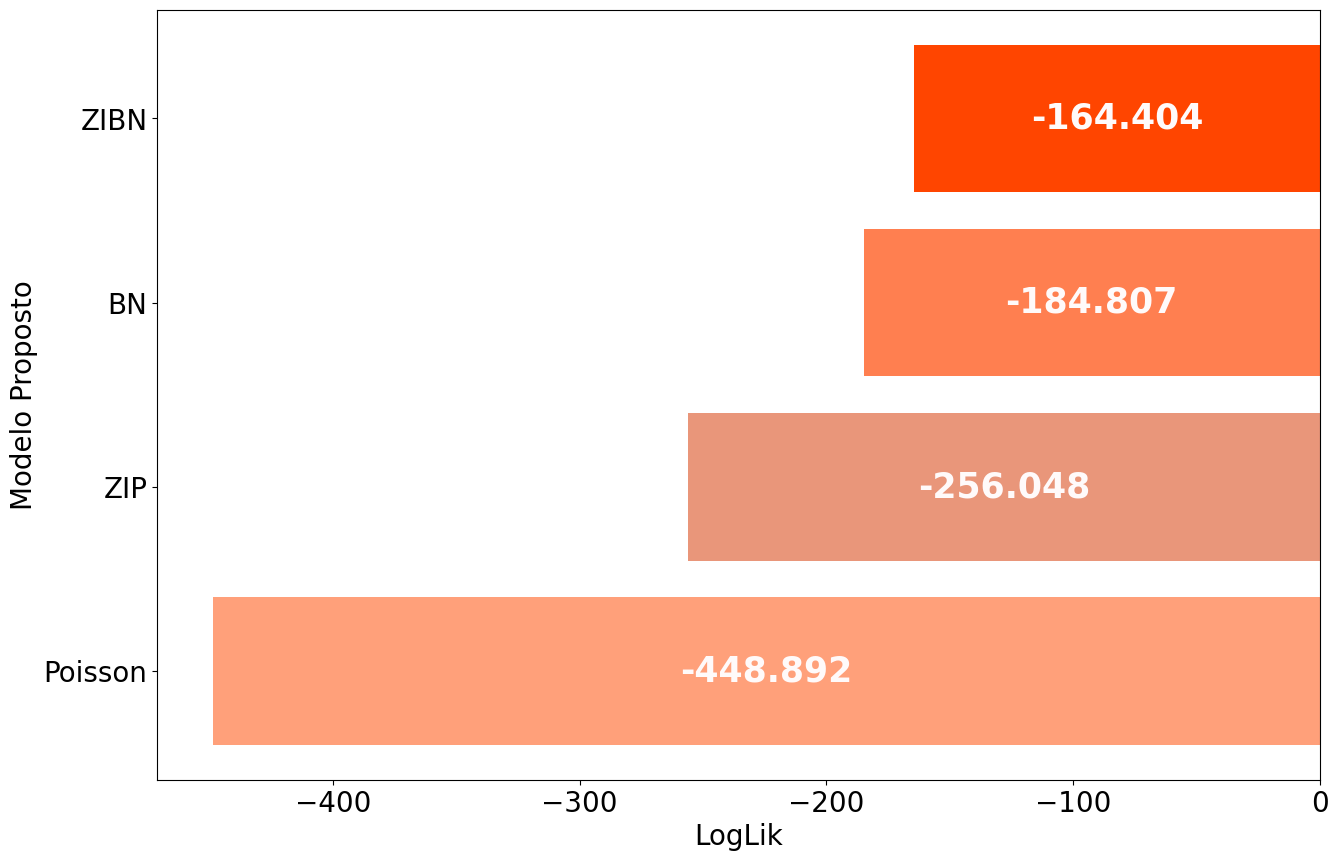

In [214]:
#%% Visualizando graficamente as loglik

# Definição do dataframe com os modelos e respectivos LogLiks
df_llf = pd.DataFrame({'modelo':['ZIP','ZIBN', 'Poisson', 'BN'],
                       'loglik':[modelo_zip.llf, 
                                 modelo_zibn.llf, 
                                 modelo_poisson.llf, 
                                 modelo_bn.llf]}).sort_values(by=['loglik'])

# Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(15,10))

c = ['lightsalmon', 'darksalmon', 'coral', 'orangered']

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='snow', fontsize=25, weight='bold')
ax.set_ylabel("Modelo Proposto", fontsize=20)
ax.set_xlabel("LogLik", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
plt.show()


## Fazendo predições

In [206]:
# Valores preditos pelo modelo para observações da amostra
acidentes['bn_zi'] = modelo_zibn.predict(X1, exog_infl=X2)

In [215]:
pred_zibn = modelo_zibn.predict(pd.DataFrame({'const': [1],
                                              'pop': [1.5]}),
                                exog_infl=pd.DataFrame({'const': [1],
                                                        'idade': [38],
                                                        'leiseca': [1]}))

print(f"Quant. Estimada de Acidentes por Semana: {round(pred_zibn[0], 2)}")


Quant. Estimada de Acidentes por Semana: 3.46


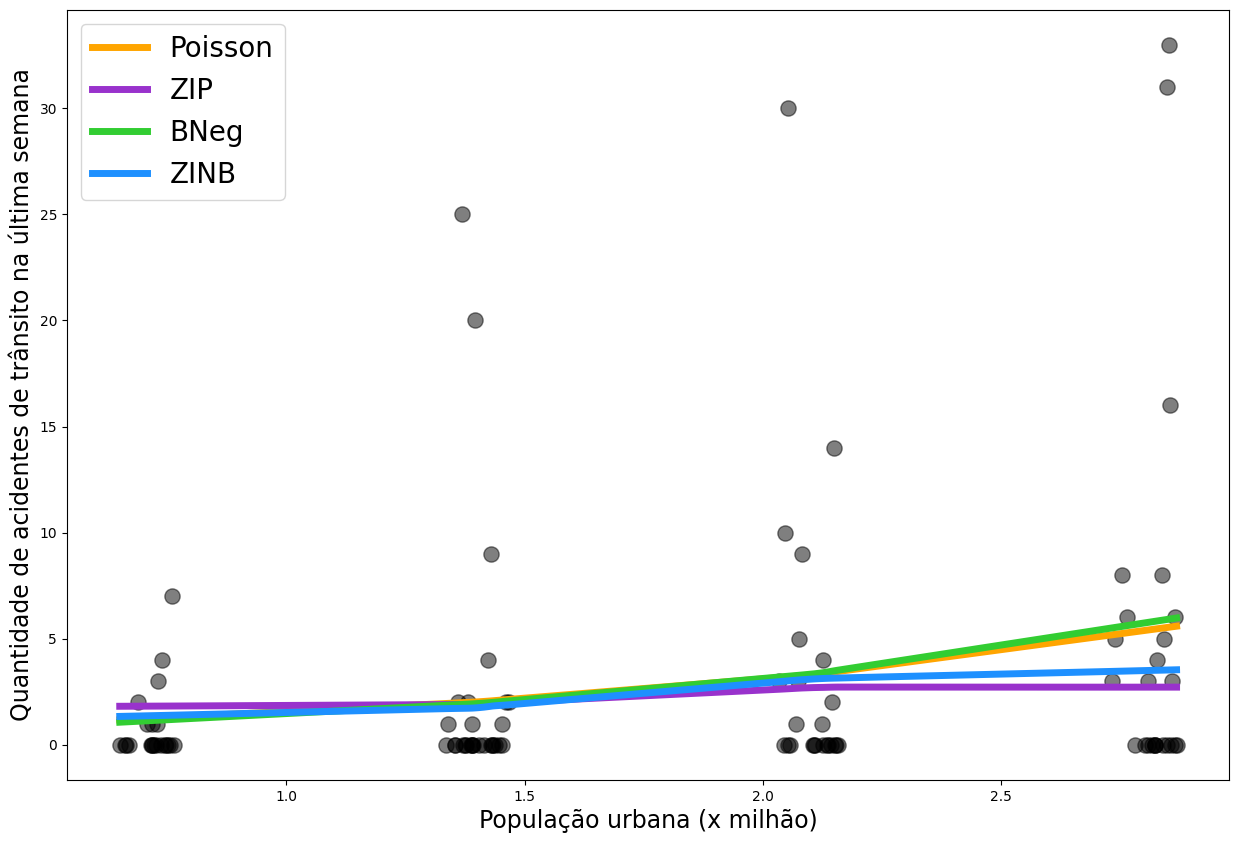

In [216]:
#%% Comparando as previsões dos modelos

plt.figure(figsize=(15,10))
sns.regplot(data=acidentes, x=acidentes['pop'], y=acidentes['poisson'],
            ci=None, marker='o', lowess=True, scatter=False,
            label='Poisson',
            line_kws={'color':'orange', 'linewidth':5})
sns.regplot(data=acidentes, x=acidentes['pop'], y=acidentes['poisson_zi'],
            ci=None, marker='o', lowess=True, scatter=False,
            label='ZIP',
            line_kws={'color':'darkorchid', 'linewidth':5})
sns.regplot(data=acidentes, x=acidentes['pop'], y=acidentes['bn'],
            ci=None, marker='o', lowess=True, scatter=False,
            label='BNeg',
            line_kws={'color':'limegreen', 'linewidth':5})
sns.regplot(data=acidentes, x=acidentes['pop'], y=acidentes['bn_zi'],
            ci=None, marker='o', lowess=True, scatter=False,
            label='ZINB',
            line_kws={'color':'dodgerblue', 'linewidth':5})
sns.regplot(data=acidentes, x=acidentes['pop'], y=acidentes['acidentes'],
            ci=None, marker='o', fit_reg=False,
            scatter_kws={'color':'black', 's':120, 'alpha':0.5})
plt.xlabel('População urbana (x milhão)', fontsize=17)
plt.ylabel('Quantidade de acidentes de trânsito na última semana', fontsize=17)
plt.legend(fontsize=20)
plt.show()

# Anotações

## Requisitos do método MQO

O método dos Mínimos Quadrados Ordinários, utilizadas nas análises de regressão simples e múltipla parte de alguns pressupostos:

1. Aderência dos resíduos à normalidade
2. Ausência de heterocedasticidade
3. Ausência de multicolinearidade

E consequentemente, avaliar a necessidade de uma transformação de box-cox

### Multicolinearidade

Para verificar a existência de multicolinearidade, fazemos uma tabela de correlação de pearson.

### Variáveis categóricas na base de dados

Caso haja variáveis categóricas na base de dados, precisamos fazer o processo de dummyzação, onde serão geradas n-1 dummies para cada categoria.

### Aderência dos resíduos à normalidade

Para verificar a aderência dos resíduos à normalidade, aplicamos o teste de shapiro frância. Caso não seja aderente, precisaremos fazer o procedimento de transformação de box-cox.

### Ausência de Heterocedasticidade

Para verificar a ausência de heterocedasticidade, utilizamos o teste de Breusch-Pagan

## Modelo logístico binário

- Utiliza o **Método de Máxima Merossimilhança**
- É calculado um logito $Z$ que é dado pelo modelo a ser estimado
- A probabilidade da ocorrência do evento é dado por $p_i = \dfrac{1}{1+ e^{-Z}}$

Um meio de avaliar a eficácia do modelo é a análise da **curva ROC**.

### Variáveis categóricas no modelo

Elas serão tratadas como no modelo OLS, serão geradas n-1 dummies como variáveis explicativas, para cada categoria.

### Cutoff

Ponto de corte que define a classificação entre ocorrência do evento ou não. É um limiar em que caso a probabilidade de ocorrência do evento for maior que o valor definido, consideraremos que o evento irá ocorrer.

\begin{align}
&P_i > \text{cutoff} \longrightarrow \text{Ocorrência do evento} \\
&P_i < \text{cutoff} \longrightarrow \text{Não ocorrência do evento},
\end{align}

Sobre a matriz de confusão, temos algumas métricas:

#### Sensitividade

- *Sensitividade (Recall)* - É a taxa de acerto de quem foi evento. Por exemplo, se de 59 pessoas que foram eventos, acertamos 46, então $\text{Recall} = \dfrac{46}{56} = 82,14\%$. É a taxa do **Verdadeiro Positivo**, ou $TP$.
    * $\text{Sensitividade} = \dfrac{\text{nº acertos eventos}}{\text{nº eventos}} = \dfrac{TP}{TP+FN}$

#### Especificidade

- *Especificidade*, que é a taxa de acerto de quem não foi evento. É a taxa do **Verdadeiro Negativo**, ou $TN$.
    * $\text{Especificidade} = \dfrac{\text{nº acertos não eventos}}{\text{nº  de não eventos}} = \dfrac{TN}{FP+TN}$

#### Acurácia

- *Acurácia global do modelo* = quantidade total de acertos sobre a quantidade total de pessoas.
    * $\text{Acurácia global} = \dfrac{\text{nº acertos}}{\text{nº de eventos}} = \dfrac{TP + TN}{TP+ TN + FP +FN}$

#### Precisão

- $\text{Precision} = \dfrac{TP}{TP+FP}$

#### $F1_\text{score}$

- $F1_\text{score} = \dfrac{ 2.\text{Recall } . \text{Precision} } { \text{Recall} + \text{Precision} }$

### Odds Ratio ($\beta$)

Odds Ratio para os valores de $\beta$ é definida como $e^\beta$. A interpretação no contexto da análise logística, é que um Odds Ratio de 2.7 significa que a presença daquela característica, ou incremento de 1 unidade da mesma, significa que a chance do evento ocorrer é multiplicada por um fator de 2.7, ou seja, é 170% maior.

### Chance

Definida como $\dfrac{P_i}{1-P_i}$

## Modelagem para dados de Contagem

É possível utilizar duas distribuições: Poisson ou Binomial Negativa.

Pode conter duas situações: 

1. Contagem execessiva de zeros
2. Superdispersão dos dados



A escolha do modelo depende de algumas características:

\begin{array}{|c|c|c|c|c|}
\hline
Verificação & \text{Poisson} & \text{Binomial Negativa} & \text{Poisson Inflacionado de Zeros (ZIP)} & \text{Binomial Negativa Inflacionada de Zeros (ZINB)} \\
\hline
\text{Superdispersão nos dados da variável dependente} & \text{não} & \text{sim} & \text{não} & \text{sim} \\
\hline
\text{Quantidade excessiva de zeros na variável dependente} & \text{não} & \text{não} & \text{sim} & \text{sim} \\
\hline
\end{array}



#### Superdispersão

Se a variância dos dados é muito superior à média, é um indício de superdispersão.

#### Especificação do modelo Zero Inflated

O modelo retorna um $p_{logit}$ que representa a probabilidade de se observar um valor igual a zero.

#### Inflação de zeros

#### Binomial Negativa

Na especificação do modelo, geramos um $P_{logit}$ que corresponde a probabilidade de se observar um valor igual a zero, e um $\lambda_i$ que corresponde a parte de dados de contagem. 

\begin{align}
&P_{logit_i} = \dfrac{1}{1+e^{-(\gamma) + \delta_1.W_{1i} + \delta_2.W_{2i} + \dots + W_n.X_{ni}}} \\
\\
&\lambda_i = e^{(\alpha + \beta_1.X_{1i} + \beta.X_{2i})+\dots+\beta_k.X_{ki}}
\end{align}

A predição de contagens é dada por

\begin{equation}
\lambda = (1 - P_{logit}).\lambda_i
\end{equation}

Nessa distribuição a média é igual ao valor esperado:

\begin{equation}
E(Y) = \lambda_{bneg}
\end{equation}

Já a variância é dada por: 

\begin{equation}
Var(Y) = \lambda_{bneg} + \phi.(\lambda_{bneg})^2
\end{equation}

Onde $\phi = \dfrac{1}{\theta}$ é o parâmetro de dispersão

Se $\phi$ é estatisticamente diferente zero, então estimamos um modelo com superdispersão com cauda longa. Caso seja igual a zero, então estamos lidando com a função Poisson.

No python, o parâmetro `alpha` é igual ao parâmetro $\phi$. Se ele for estatísticamente diferente de zero, há superdispersão.

## Ceteris Paribus

Significa: "Mantidas as demais condições"